3 Takeaways:

1. Urban cities generally have more drivers and lower fares. These cities account for 78% of drivers, but only 63% of fares paid. It is not clear, however, whether greater availibility of drivers drives down fares. This disparity may reflect other factors such as trip distance.

2. There is no obvious correlation between fares and ridership. In the bubble chart below, the size of the bubbles represents the number of rides by city, while the y-axis shows the average fare. There is no clear relationship between the two, with small and large bubbles appearing in both the upper and lower portions of the chart.

3. When looking at the bubble chart, it is clear that urban cities have less variation in fares, compared to rural and suburban cities.

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

city_data=r'C:\Users\marks\OneDrive\Desktop\Python folder\city_data.csv'
ride_data=r'C:\Users\marks\OneDrive\Desktop\Python folder\ride_data.csv'

city_df=pd.read_csv(city_data)
ride_df=pd.read_csv(ride_data)

In [203]:
ride_grouped=ride_df.groupby('city')

fare=ride_grouped['fare'].sum()
numberofrides=ride_grouped['ride_id'].count()
avg_fare=fare/numberofrides

city_grouped=city_df.groupby('city')

drivers=city_grouped['driver_count'].sum()
city_type=city_grouped['type'].unique()

city_summary=pd.DataFrame({"City Type": city_type,
                           "Number of Drivers": drivers,
                           "Fare": fare, 
                           "Average Fare":avg_fare,
                          "Number of rides": numberofrides})

city_summary['City Type']=city_summary['City Type'].str[0]




In [204]:
fare=[]
city_type=[]
drivers=[]
rides=[]

fare.append(city_summary['Average Fare'])
city_type.append(city_summary['City Type'])
drivers.append(city_summary['Number of Drivers'])
rides.append(city_summary['Number of rides'])

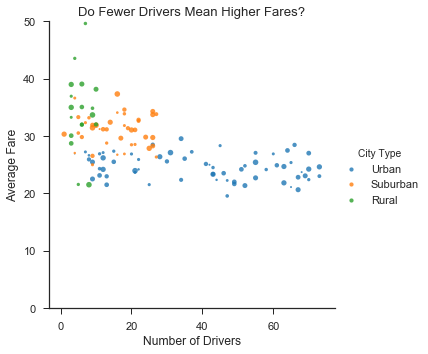

In [205]:
plt.figure(figsize=(15,12))
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

marker_size = rides
sns.lmplot('Number of Drivers', 'Average Fare', data=city_summary, hue='City Type', fit_reg=False, scatter_kws={'s':marker_size})
plt.title('Do Fewer Drivers Mean Higher Fares?')
plt.xlabel('Number of Drivers')
plt.ylabel('Average Fare')
plt.ylim((0, 50))
plt.savefig('sns.png')

In [206]:
new_summary=city_summary
new_summary.reset_index()

city_type=new_summary['City Type']
city_type_list=city_type.tolist()

fare=new_summary['Fare']
fare_list=fare.tolist()

drivers=new_summary['Number of Drivers']
drivers_list=drivers.tolist()

rides=new_summary['Number of rides']
rides_list=rides.tolist()

bytype=pd.DataFrame({"Ride_number": rides_list,
                     "Type_city": city_type_list,
                     "Driver_number": drivers_list,
                     "Sum_fare": fare_list})

bytypegrouped=bytype.groupby("Type_city")
ridesum=bytypegrouped['Ride_number'].sum()
driversum=bytypegrouped['Driver_number'].sum()
faresum=bytypegrouped['Sum_fare'].sum()

summary_table=pd.DataFrame({"Number of rides": ridesum,
                     "Number of drivers": driversum,
                     "Sum of Fares": faresum})

summary_table.head()

,Number of drivers,Number of rides,Sum of Fares
Type_city,,,
Rural,104,125,4255.09
Suburban,638,625,19317.88
Urban,2607,1625,40078.34


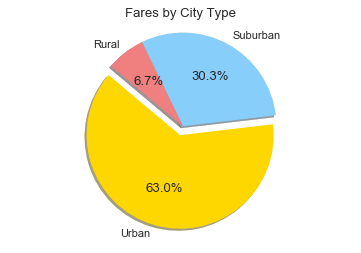

In [216]:
city_categories = ["Urban", "Suburban", "Rural"]
fares_added=[40078, 19318, 4255]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0.1,0,0)

plt.pie(fares_added, explode=explode, labels=city_categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Fares by City Type")
plt.savefig('fares.png')

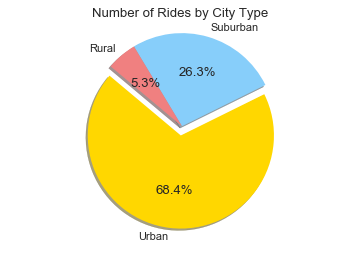

In [217]:
rides_added=[1625, 625, 125]
plt.pie(rides_added, explode=explode, labels=city_categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Number of Rides by City Type")
plt.savefig('rides.png')

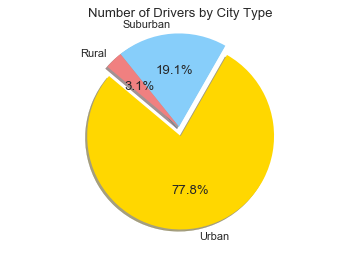

In [218]:
rides_added=[2607, 638, 104]
plt.pie(rides_added, explode=explode, labels=city_categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Number of Drivers by City Type")
plt.savefig('drivers.png')